In [470]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

### Input (X,Y)
Initialize the input points X,Y for knn classification and plot a scatter graph

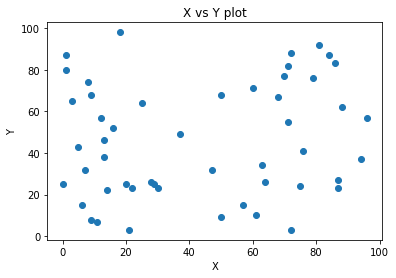

In [474]:
np.random.seed(1)
x = np.random.randint(0,100,50)
y = np.random.randint(0,100,50)
plt.scatter(x,y)
plt.title("X vs Y plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## KNN Classifier
Define the knn algorithm for classification for the (X,Y) input.
1. Random Initialize the k-centroid points
2. Calculate the dist between each (x,y) against each k-centroid point
3. Find the min dist and assign class to that (x,y) point based on the index of the centroid used
4. Find the cost function by using the min dist for each (x,y)
5. Update the centroid position by finding the average value of (x,y) points assigned to it
6. Repeat steps 2-5 to get the min cost

### 1. Cost Function
Cost function is $J = \frac{1}{m}\sqrt{(x-kx)^2 + (y-ky)^2}$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; where **(kx,ky)** is the x,y co-ordinate of the k-centroid point and <br>
&nbsp;&nbsp;&nbsp;&nbsp; **m** is the no of examples.

**NOTE:** The Cost function used here $\frac{1}{m}[(x-kx)^2 + (y-ky)^2]$ since we are trying to minimize the cost it does not matter if we use sqrt or not. Hence removing the sqrt to save processing time.

### 2. Update centroid points
Change the (x,y) co-ordinates to all k-centroids based on the Average of the input points that are assigned to it.

$ki = \frac{x1+x2+...+xn}{n}, \frac{y1+y2+...+yn}{n}$ <br>
&nbsp;&nbsp;&nbsp;&nbsp; where **ki** is ith k-centroid point, <br>
&nbsp;&nbsp;&nbsp;&nbsp; **x1,x2,...,xn** and **y1,y2,...,yn** are the (x,y) co-ordinates of the input points that is classified w.r.t the ith centroid point is the no of examples.

In [475]:
class Knn_Classification():
    def __init__(self, x, y, k=3):
        self.k = k # no. of centroid points
        self.m = len(x) # no of input points
        self.cls = np.zeros(self.m) # classifier_list -> will have the index of the centroid with min distance
        self.cost = 0
        
        # Random init the k-centroid points
        self.centroid = list(zip(np.random.randint(np.min(x),np.max(x),k),np.random.randint(np.min(y),np.max(x),k)))
         
    def assign_class(self,x,y):
        self.cost = 0
        for i in range(self.m):
            dist = []
            for p in range(len(self.centroid)):
                # Calculate the dist between k points to (x,y)
                # dist.append(math.sqrt((x[i]-self.centroid[p][0])**2 + (y[i]-self.centroid[p][1])**2))
                dist.append((x[i]-self.centroid[p][0])**2 + (y[i]-self.centroid[p][1])**2)
                
            # Assign classifier_list with index of min. dist
            self.cls[i] = np.argmin(dist)
            
            # Add the min. dist to the cost function
            self.cost += np.min(dist)/self.m
        
        # Convert the index to int type -> [0., 1., 2.] changed to [0,1,2]
        # Required for colors in scatter plot
        self.cls = self.cls.astype(int)
    
    def update_centroid(self,x,y):
        for i in range(self.k):
            idx = np.where(self.cls==i)
            self.centroid[i] = (np.mean(x[idx]), np.mean(y[idx]))
    
    def plot_graph(self,x,y):
        colormap = np.array(['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',
           'tab:pink','tab:grey','tab:olive','tab:cyan'])
        plt.scatter(x,y,s=100,c=colormap[self.cls])
        plt.scatter(list(zip(*self.centroid))[0], list(zip(*self.centroid))[1], s=50,c='k')
        plt.title("KNN classification with k={} points".format(self.k))
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()
        print("Cost: {}\nCentroids:".format(self.cost), end=' ')
        for i in self.centroid:
            print("({:.2f},{:.2f})".format(i[0],i[1]), end=' ')
    

In [482]:
# Random init the classifier and find the best fit
cost = []
cent = []
epoch = 50
for j in range(10):
    iter_cost = []
    t = Knn_Classification(x,y,k=5)
    for i in range(epoch):
        t.assign_class(x,y)
        iter_cost.append(t.cost)
        t.update_centroid(x,y)
    
    cost.append(t.cost)
    cent.append(t.centroid)
#     print("Run {}".format(j))
#     plt.scatter(x=range(epoch), y=iter_cost)
#     plt.xlabel("No. of Iterations")
#     plt.ylabel("Cost")
#     plt.show()

# Find min cost and its corresponding centroids
t.centroid = cent[np.argmin(cost)]
t.assign_class(x,y)
print("Minimum Cost details \nCost={}\nCentroids:".format(t.cost), end=' ')
for i in t.centroid:
    print("({:.2f},{:.2f})".format(i[0],i[1]), end=' ')

Minimum Cost details 
Cost=234.43866300366298
Centroids: (69.42,23.42) (16.42,19.50) (6.67,78.67) (17.29,49.86) (75.08,74.23) 

### KNN Classification Plot
Plot the scatter plot for the centroid points that have the least cost. The points in black represent the final k-centroid points that gives the least cost.

The Cost and the co-ordinates for the k-centroids are also shown.

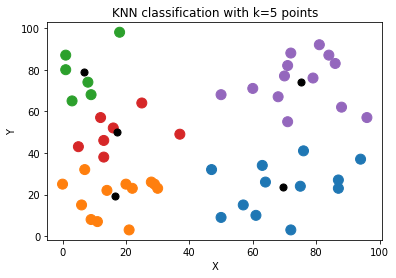

Cost: 234.43866300366298
Centroids: (69.42,23.42) (16.42,19.50) (6.67,78.67) (17.29,49.86) (75.08,74.23) 

In [483]:
t.plot_graph(x,y)